## **Project:** Medical Insurance Cost Prediction

- Basic Understanding of Data
- Exploratory Data Analysis
- Data Preprocessing and Feature Engineering
- Train Test Split
- Model Building and Model Evaluation 
- Hyper-Parameter Tuning
- Prediction on new Data
- Model Deployment 




**Which Factors Influence the Price/Cost of Health Insurance?**

<img src="images/p5.jpg" height=400px width=400px>

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(\frac {kg} {m^2})$ using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
url ="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(url)


## Basic Understanding of Dataset

In [3]:
df.head(2)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# number of row/columns
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# check missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# separate categorical columns & Numerical columns , features and label variable

cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
num_columns = df.select_dtypes(include=np.number).columns.to_list()
features = df.drop(['charges'], axis=1).columns.to_list()
label = 'charges'

# Expolatory Data Analysis

### Uni-variate Analysis

**Plot `count-plot` for all the categorical columns**

In [11]:
# for i in range(len(cat_columns)):
#     plt.subplot(2,2,i+1)
#     sns.countplot(cat_columns[i], data=df)
#     plt.show()

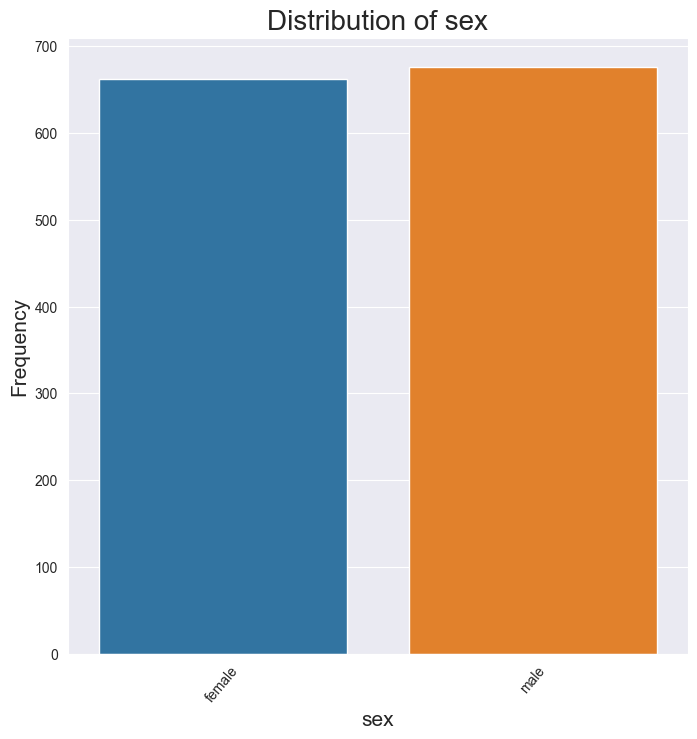

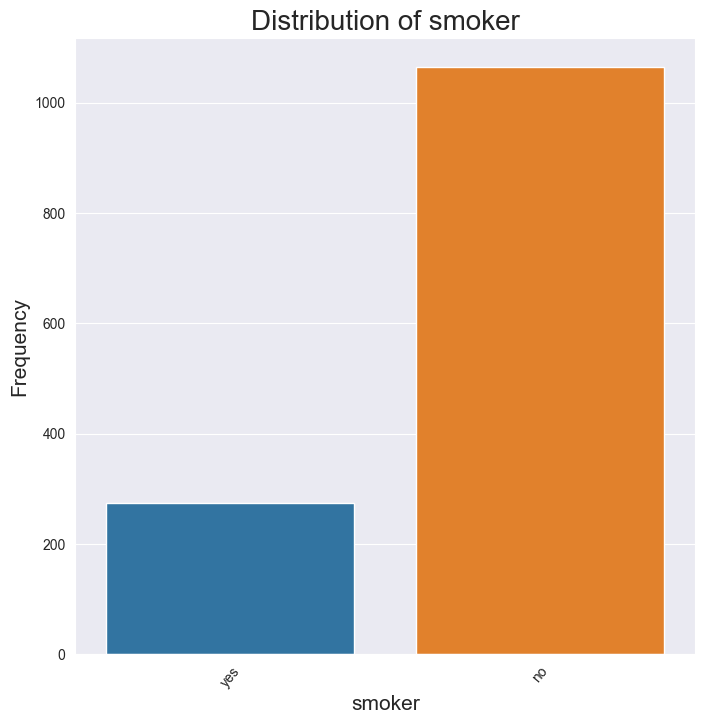

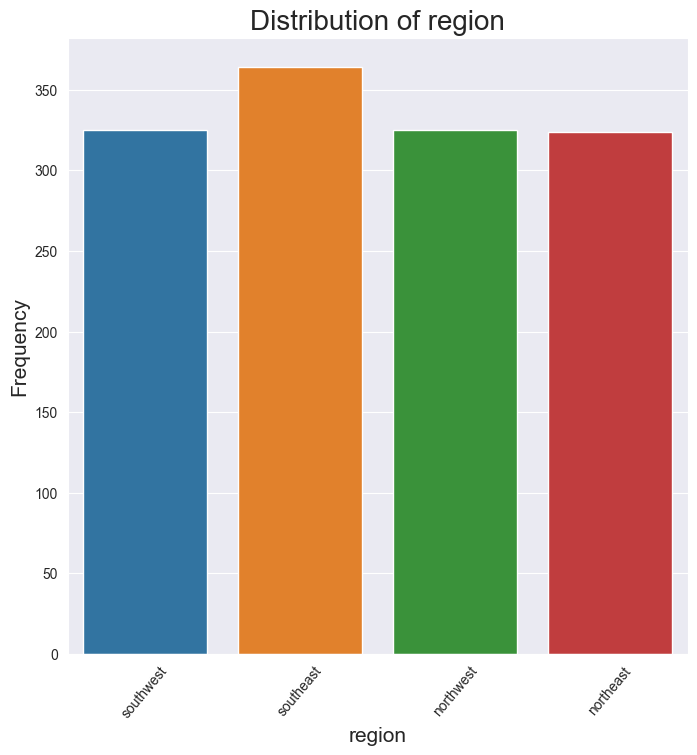

In [12]:
sns.set_style('darkgrid')
for col in cat_columns:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()

**Plot `histogram` for all the Numerical Columns**

In [13]:
# sns.set_style('darkgrid')
# for col in num_columns:
# #     print(col)
#     plt.figure(figsize=(8,8))
#     sns.histplot(df[col])
#     plt.title(f"Histogram of {col}", fontsize=20)
#     plt.xlabel(f"{col}", fontsize=15)
#     plt.ylabel("Frequency", fontsize=15)
#     plt.xticks(rotation=50)
#     plt.show()

**Plot `boxplot` for all the Numerical Columns**

In [14]:
# sns.set_style('darkgrid')
# for col in num_columns:
# #     print(col)
#     plt.figure(figsize=(8,8))
#     sns.boxplot(y = df[col])
#     plt.title(f"Boxplot of {col}", fontsize=20)
#     plt.xlabel(f"{col}", fontsize=15)
#     plt.ylabel("Frequency", fontsize=15)
#     plt.xticks(rotation=50)
#     plt.show()

**Plot `Scatter plot` for Numerical-Categorical columns**

In [15]:
# for num in num_columns:
#     for cat in cat_columns:
#         sns.scatterplot(x=num, y=cat, data=df)
#         plt.show()

**Plot `Scatter-Plot` for Numerical-Target columns**

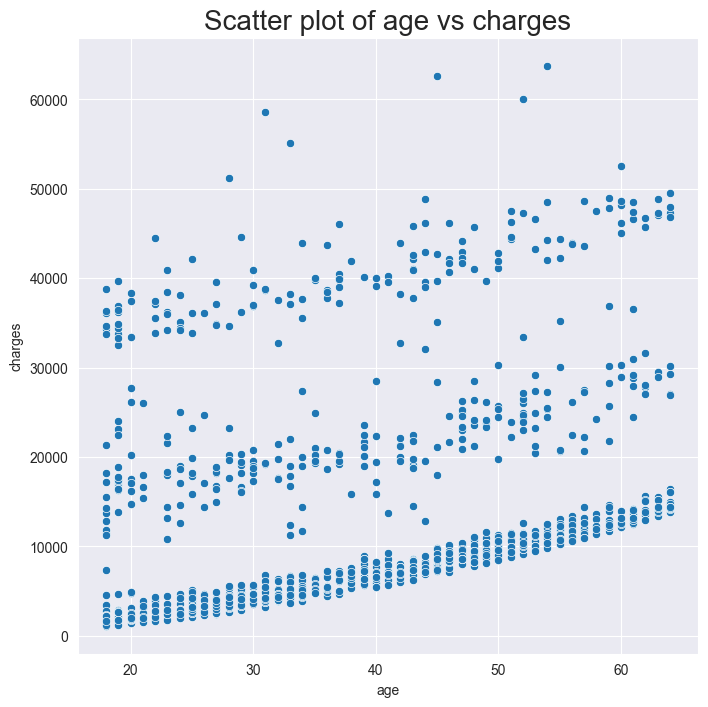

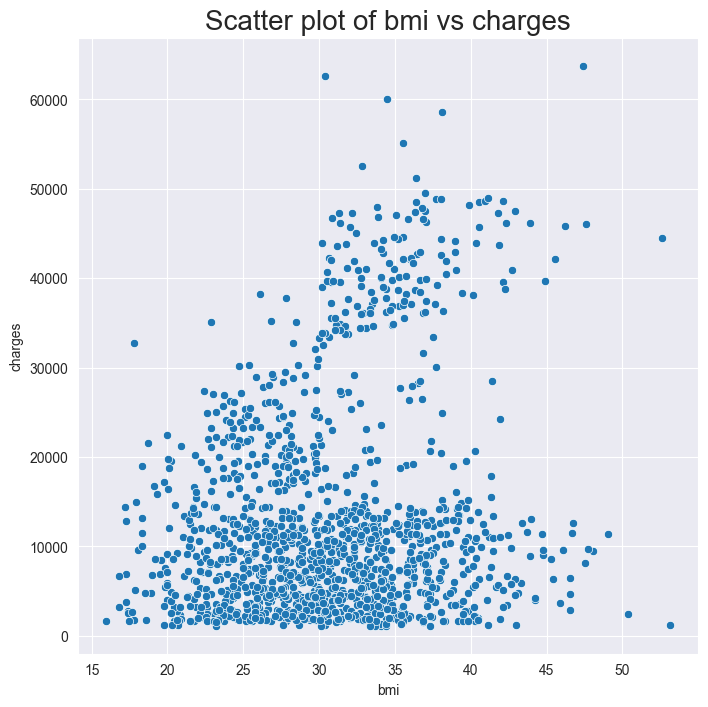

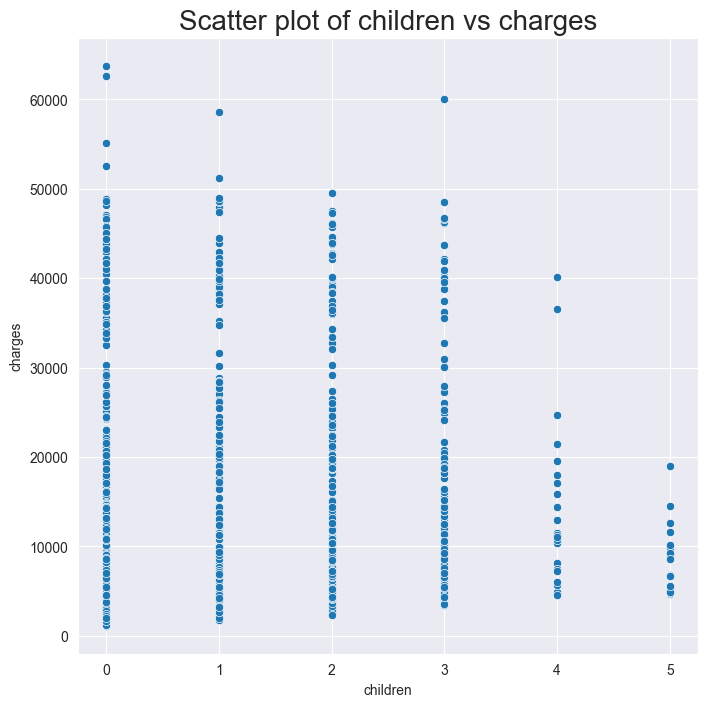

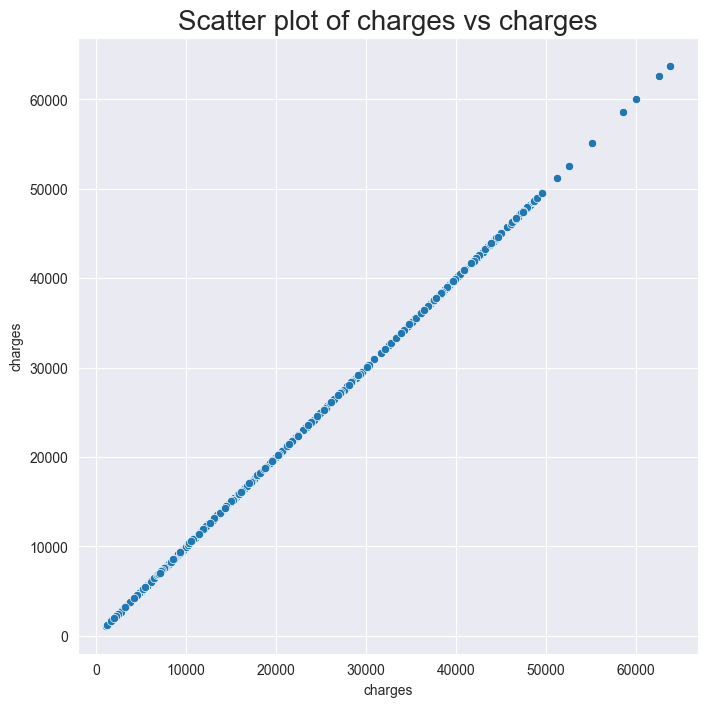

In [16]:
for num in num_columns:
    plt.figure(figsize=(8,8))    
    sns.scatterplot(x=num, y=label, data=df)
    plt.title(f"Scatter plot of {num} vs {label}", fontsize=20)
    plt.show()

**Plot a `heatmap` for numerical-categorical colummns**

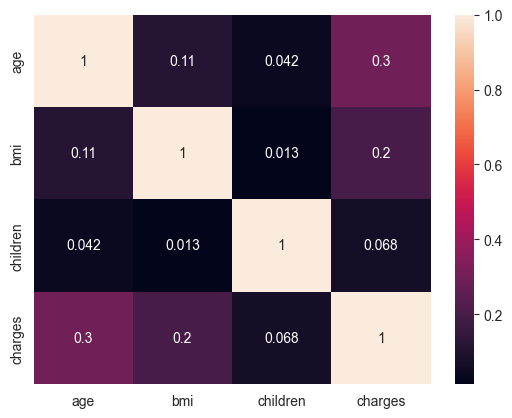

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Pipeline for Feature Engineering

In [18]:
cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
num_columns = df.select_dtypes(include=np.number).columns.to_list()
features = df.drop(['charges'], axis=1).columns.to_list()
label = 'charges'
num_columns.remove('charges')

### Column Transformer

In [19]:
# Combine the transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),
        ('num', StandardScaler(), num_columns)
    ], remainder='passthrough', sparse_threshold=0
)

### Train Test Validate Split

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
print(X_val.shape)

(856, 6)
(268, 6)
(856,)
(268,)
(214,)
(214, 6)


### Model Buidling
<img src="images/p132.png" height=500px width=500px>

In [22]:
from sklearn.pipeline import Pipeline
model =  Pipeline([('preprocessor',preprocessor),
                   ('lr', LinearRegression())])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lr', LinearRegression())])

In [23]:
# fit the model on training dataset using fit method
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('lr', LinearRegression())])

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([ 8416.,  7328., 36800.,  9536., 27488., 10880.,   480., 17184.,
         736., 11296., 27776.,  9600.,  5248., 38336., 40256., 37056.,
       15136., 35840.,  8960., 31584.,  3456.,  9920.,  2464.,  7040.,
       11232., 12544., 14208.,  6272.,  9408.,  2464.,  8640., 13184.,
        4736.,  3424.,  4416., 12864.,  1824.,  8544., 33216., 32640.,
        3520.,  4800., 13824., 11616.,  8864., 11776.,  5568.,  2816.,
       35360.,  9280., 15712.,  2560., 12640.,  1408., 13440., 12160.,
        4160., 32416., 13024., 12512., 13824., 10528., 15968.,  7808.,
       11424.,  4288., 26336., 10720.,  2336.,  6368., 10528., 11136.,
       10944.,  9184., 12064.,  6752.,  6944., 10816.,  6528.,  8288.,
        4064., 36192.,  6112., 30528., 35200., 34976.,  7008., 13152.,
       10016., 14144., 17120., 34976., 32512.,  5888., 32096.,  9280.,
       29472.,  3840., 28288.,  5344.,  5632.,  1856., 11712., 14720.,
       11264.,  4576.,  9856., 31584.,  -224., 32544.,  3392., 10496.,
      

## Model Evaluarion for Train/Test Split

There are several techniques to evaluate a linear regression model. Some of the most commonly used techniques are:

<img src="images/p1.JPG" align="right">

**Mean Absolute Error (MAE):**

- It is the average of the absolute differences between the predicted and actual values. Lower the value of MAE, better the model.

**Mean Squared Error (MSE):**

- It is the average of the squared differences between the predicted and actual values. Lower the value of MSE, better the model.

**Root Mean Squared Error (RMSE):**

- It is the square root of the mean squared error. Lower the value of RMSE, better the model.

**R-squared:**
- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables. R-squared value ranges from 0 to 1, and the closer it is to 1, the better the model.

**Adjusted R-squared:**
- It is similar to R-squared, but it adjusts for the number of independent variables in the model. It is a more reliable measure of model fit when the sample size is small or when there are many independent variables.

**Residual Plot:**
- It is a plot of the residuals (predicted - actual) versus the predicted values. If the model is a good fit, the residuals should be randomly distributed around a horizontal line at zero.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 =  r2_score(y_test, y_pred)

In [28]:
n = len(y_test)
p = len(X_train.columns)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.7775350044805981

In [29]:
print("Train/Test Split Result of Linear Regression .... ")
print(f"Mean Absolute Error : {mae:.3f}")
print(f"Mean Squared Error : {mse:.3f}")
print(f"Root Mean Squared Error : {rmse:.3f}")
print(f"R-Squared : {r2:.3f}")
print(f"Adjusted R-Squared : {adjusted_r2:.3f}")

Train/Test Split Result of Linear Regression .... 
Mean Absolute Error : 4207.341
Mean Squared Error : 33761286.820
Root Mean Squared Error : 5810.446
R-Squared : 0.783
Adjusted R-Squared : 0.778


#### Residual Plot

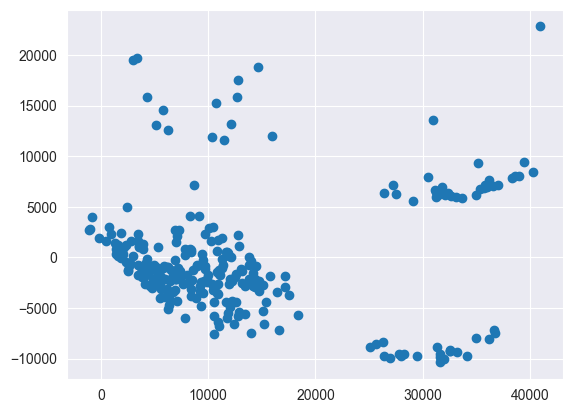

In [30]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.show()

### Model evaluation based on K-fold cross-validation using `cross_val_score()` function with` validation data`

In [31]:
model1 =  Pipeline([('preprocessor',preprocessor),
                   ('lr', LinearRegression())])
nmae = cross_val_score(model1, X_val, y_val, cv=10, scoring='neg_mean_absolute_error')
nmse =  cross_val_score(model1, X_val, y_val, cv=10, scoring='neg_mean_squared_error')
nrmse =  cross_val_score(model1, X_val, y_val, cv=10, scoring='neg_root_mean_squared_error')
r2_ =  cross_val_score(model1, X_val, y_val, cv=10, scoring='r2')

In [32]:
print("Cross Validation Result of Linear Regression .... ")
print(f"Mean Absolute Error : {-nmae.mean():.3f}")
print(f"Mean Squared Error : {-nmse.mean():.3f}")
print(f"Root Mean Squared Error : {-nrmse.mean():.3f}")
print(f"R-Squared : {r2_.mean():.3f}")

Cross Validation Result of Linear Regression .... 
Mean Absolute Error : 4863.614
Mean Squared Error : 46848461.192
Root Mean Squared Error : 6702.412
R-Squared : 0.652
